In [ ]:
import os
import cv2
import uuid
import time

In [ ]:
uuid.uuid1()#uniform unique identifier

UUID('793c75e6-6b74-11ee-a3af-0242ac1c000c')

In [ ]:
IMAGES_PATH='/content/data/images/'
image_num=20

In [ ]:
cap=cv2.VideoCapture(0)
for i in range(image_num):
    print('collecting image {}'.format(i))
    ret,frame = cap.read()
    imgname=os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname,frame)
    cv2.imshow('',frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

collecting image 0
collecting image 1
collecting image 2
collecting image 3
collecting image 4
collecting image 5


In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
images = tf.data.Dataset.list_files('/content/data/images/*.jpg',shuffle=False)

In [ ]:
images.as_numpy_iterator().next()

b'/content/data/images/25a8e298-6b42-11ee-a5a1-1c9957e84bb2.jpg'

In [ ]:
type(images)

tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset

In [ ]:
def load_image(x):
  image=tf.io.read_file(x)
  image=tf.io.decode_jpeg(image)
  return image


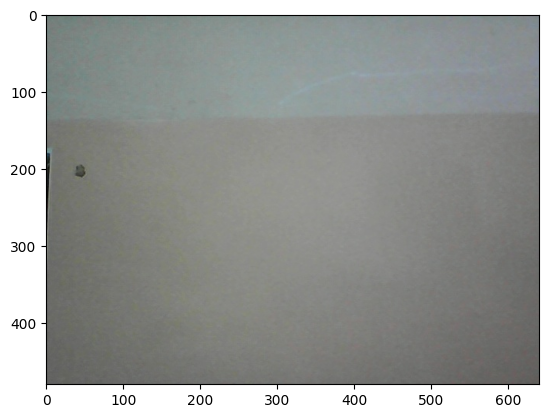

In [ ]:
plt.imshow(load_image(images.as_numpy_iterator().next()))

In [ ]:
images = images.map(load_image)

In [ ]:
image_generator = images.batch(4).as_numpy_iterator()

In [ ]:
type(image_generator)

tensorflow.python.data.ops.dataset_ops._NumpyIterator

In [ ]:
plot_images = image_generator.next()

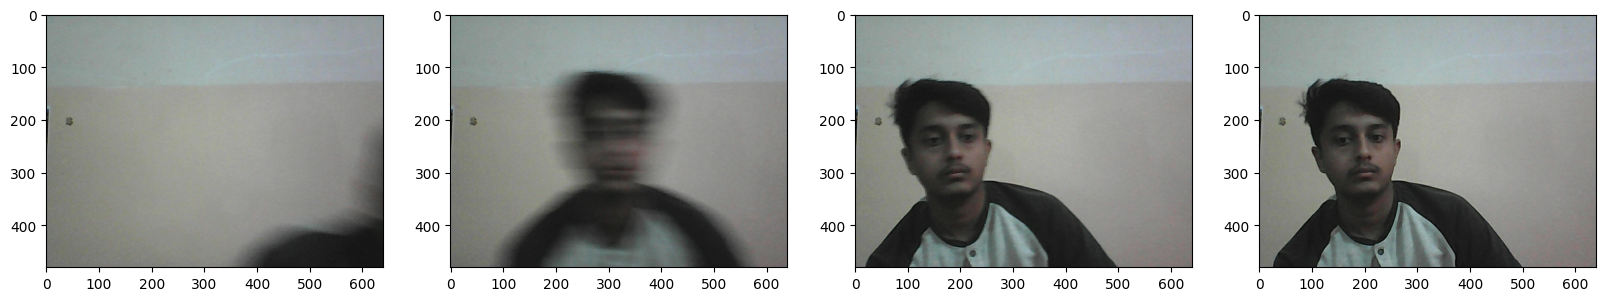

In [ ]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,image in enumerate(plot_images):
  ax[idx].imshow(image)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
94*.7 #66 to train

65.8

In [ ]:
14 #test and val

14

In [ ]:
for folder in ['train','test','val']:
  folder_path=os.path.join('/content/drive/MyDrive/data',folder,'images')
  for file in os.listdir(folder_path):
    file_name=file.split('.')[0]+'.json'
    file_path=os.path.join('/content/drive/MyDrive/data/labels',file_name)
    if os.path.exists(file_path):
      new_path=os.path.join('/content/drive/MyDrive/data',folder,'labels',file_name)
      os.replace(file_path,new_path)

In [ ]:
import albumentations as alb

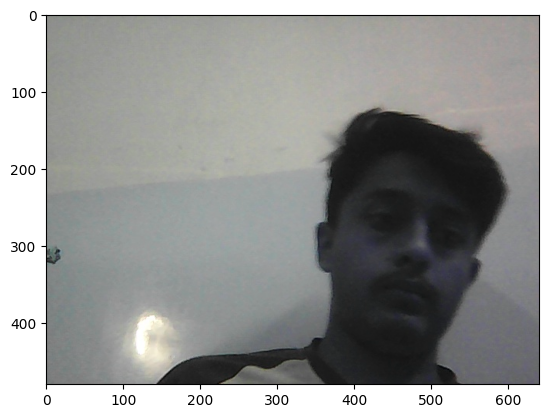

In [ ]:
img=cv2.imread('/content/drive/MyDrive/data/train/images/cb1859b2-6b41-11ee-a5a1-1c9957e84bb2.jpg')
plt.imshow(img)

In [ ]:
with open('/content/drive/MyDrive/data/train/labels/cb1859b2-6b41-11ee-a5a1-1c9957e84bb2.json','r') as f:
  label=json.load(f)

In [ ]:
type(label)

dict

In [ ]:
label

{'version': '5.3.1',
 'flags': {},
 'shapes': [{'label': 'face',
   'points': [[351.01604278074865, 108.98395721925134],
    [615.7219251336899, 454.97326203208553]],
   'group_id': None,
   'description': '',
   'shape_type': 'rectangle',
   'flags': {}}],
 'imagePath': '../images/cb1859b2-6b41-11ee-a5a1-1c9957e84bb2.jpg',
 'imageData': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHgAoADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRo

In [ ]:
label['shapes']

[{'label': 'face',
  'points': [[351.01604278074865, 108.98395721925134],
   [615.7219251336899, 454.97326203208553]],
  'group_id': None,
  'description': '',
  'shape_type': 'rectangle',
  'flags': {}}]

In [ ]:
bbox = label['shapes'][0]['points']

In [ ]:
bbox

[[351.01604278074865, 108.98395721925134],
 [615.7219251336899, 454.97326203208553]]

In [ ]:
pt1=bbox[0][0]
pt2=bbox[0][1]
first_pt=(int(pt1),int(pt2))

In [ ]:
type(first_pt)

tuple

In [ ]:
print(pt1,pt2)
type(pt1)

351.01604278074865 108.98395721925134


float

In [ ]:
pt3=bbox[1][0]
pt4=bbox[1][1]
second_pt=(int(pt3),int(pt4))

In [ ]:
print(pt3,pt4)

615.7219251336899 454.97326203208553


In [ ]:
img=cv2.rectangle(img,first_pt,second_pt,(255, 0, 0),2)

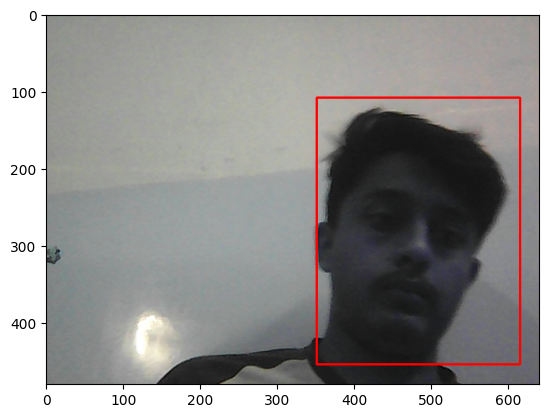

In [ ]:
plt.imshow(img)

In [ ]:
#normalized coords
coord=[int(pt1),int(pt2),int(pt3),int(pt4)]
coord=list(np.divide(coord,[640,480,640,480]))
coord

[0.5484375, 0.225, 0.9609375, 0.9458333333333333]

In [ ]:
augmentor=alb.Compose([
    alb.RandomCrop(width=450,height=450),
    alb.HorizontalFlip(p=0.5),
    alb.RandomBrightnessContrast(p=0.2),
    alb.RandomGamma(p=0.2),
    alb.RGBShift(p=0.2),
    alb.VerticalFlip(p=0.5)
    ],bbox_params=alb.BboxParams(format='albumentations',label_fields=['class_labels']))

In [ ]:
label

{'version': '5.3.1',
 'flags': {},
 'shapes': [],
 'imagePath': '../images/2795cf76-6b42-11ee-a5a1-1c9957e84bb2.jpg',
 'imageData': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHgAoADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwCvyTQB7cfSnjj60uc9uKDNsaBil5zSkA8U4be

In [ ]:
augmented=augmentor(image=img,bboxes=[coord],class_labels=['face'])

NameError: ignored

In [ ]:
augmented['bboxes']

[(0.7066666666666667, 0.2111111111111111, 1.0, 0.98)]

In [ ]:
#augmenting all data

In [ ]:
label['shapes'][0]['points']

IndexError: ignored

In [ ]:
# for folder in ['train','test','val']:
#   for file in os.listdir(os.path.join('/content/drive/MyDrive/data',folder,'images')):
#     img=cv2.imread(os.path.join('/content/drive/MyDrive/data',folder,'images',file))
#     label_path=os.path.join('/content/drive/MyDrive/data',folder,'labels',f'{file.split(".")[0]}.json')
#     coords=[0,0,0.00001,0.00001]
#     if os.path.exists(label_path):
#       with open(label_path,'r') as f:
#         label=json.load(f)
#       coords[0]=label['shapes'][0]['points'][0][0]
#       coords[1]=label['shapes'][0]['points'][0][1]
#       coords[2]=label['shapes'][0]['points'][1][0]
#       coords[3]=label['shapes'][0]['points'][1][1]
#       coords=list(np.divide(coords,[640,480,640,480]))

#     try:
#       for x in range(60):
#         augmented=augmentor(image=img,bboxes=[coords],class_labels=['face'])
#         cv2.imwrite(os.path.join('/content/drive/MyDrive/data/aug_data',folder,'images',f'{file.split(".")[0]}.{x}.jpg'),augmented['image'])
#         annotation={}
#         annotation['image']=file

#         if os.path.exists(label_path):
#           if len(augmented['bboxes']) == 0:
#             annotation['bbox']=[0,0,0,0]
#             annotation['class']=0
#           else:
#             annotation['bbox']=augmented['bboxes'][0]
#             annotation['class']=1
#         else:
#           annotation['bbox']=[0,0,0,0]
#           annotation['class']=0

#         with open(os.path.join('/content/drive/MyDrive/data/aug_data',folder,'labels',f'{file.split(".")[0]}.json'),'w') as r:
#           json.dump(annotation,r)

#     except Exception as e:
#       print(e)

IndexError: ignored

In [ ]:
# for partition in ['train']:
#     for image in os.listdir(os.path.join('/content/drive/MyDrive/data', partition, 'images')):
#         img = cv2.imread(os.path.join('/content/drive/MyDrive/data', partition, 'images', image))

#         coords = [0,0,0.00001,0.00001]
#         label_path = os.path.join('/content/drive/MyDrive/data', partition, 'labels', f'{image.split(".")[0]}.json')
#         if os.path.exists(label_path):
#             with open(label_path, 'r') as f:
#                 label = json.load(f)
#             if len(label['shapes'][0]['points'][0]) !=0:
#               coords[0] = label['shapes'][0]['points'][0][0]
#               coords[1] = label['shapes'][0]['points'][0][1]
#               coords[2] = label['shapes'][0]['points'][1][0]
#               coords[3] = label['shapes'][0]['points'][1][1]
#               coords = list(np.divide(coords, [640,480,640,480]))

#         try:
#             for x in range(60):
#                 augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
#                 cv2.imwrite(os.path.join('/content/drive/MyDrive/data/aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

#                 annotation = {}
#                 annotation['image'] = image

#                 if os.path.exists(label_path):
#                     if len(augmented['bboxes']) == 0:
#                         annotation['bbox'] = [0,0,0,0]
#                         annotation['class'] = 0
#                     else:
#                         annotation['bbox'] = augmented['bboxes'][0]
#                         annotation['class'] = 1
#                 else:
#                     annotation['bbox'] = [0,0,0,0]
#                     annotation['class'] = 0


#                 with open(os.path.join('/content/drive/MyDrive/data/aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
#                     json.dump(annotation, f)

#         except Exception as e:
#             print(e)

IndexError: ignored

In [ ]:
train_images=tf.data.Dataset.list_files('/content/drive/MyDrive/data/aug_data/train/images/*.jpg',shuffle=False)
train_images=train_images.map(load_image)
train_images=train_images.map(lambda x:tf.image.resize(x,(120,120)))
train_images=train_images.map(lambda x:x/255)

In [ ]:
test_images=tf.data.Dataset.list_files('/content/drive/MyDrive/data/aug_data/test/images/*.jpg',shuffle=False)
test_images=test_images.map(load_image)
test_images=test_images.map(lambda x:tf.image.resize(x,(120,120)))
test_images=test_images.map(lambda x:x/255)

In [ ]:
val_images=tf.data.Dataset.list_files('/content/drive/MyDrive/data/aug_data/val/images/*.jpg',shuffle=False)
val_images=val_images.map(load_image)
val_images=val_images.map(lambda x:tf.image.resize(x,(120,120)))
val_images=val_images.map(lambda x:x/255)

In [ ]:
val_images.as_numpy_iterator().next()

array([[[0.50490195, 0.60245097, 0.5577206 ],
        [0.5119485 , 0.59117645, 0.55735296],
        [0.50557595, 0.58792895, 0.5604779 ],
        ...,
        [0.46568626, 0.5529412 , 0.50539213],
        [0.46550244, 0.5733456 , 0.5148897 ],
        [0.47800246, 0.56672794, 0.51617646]],

       [[0.5011642 , 0.5987132 , 0.55802697],
        [0.5098652 , 0.584375  , 0.5608456 ],
        [0.5176471 , 0.6       , 0.57254905],
        ...,
        [0.4778799 , 0.5641544 , 0.51709557],
        [0.4719363 , 0.5720588 , 0.5210784 ],
        [0.49031863, 0.5752451 , 0.5288603 ]],

       [[0.5127451 , 0.6       , 0.57009804],
        [0.51715684, 0.59166664, 0.5681372 ],
        [0.5132353 , 0.5955882 , 0.5681372 ],
        ...,
        [0.4754289 , 0.56868875, 0.5181373 ],
        [0.47493872, 0.57003677, 0.5190564 ],
        [0.4704657 , 0.57732844, 0.528799  ]],

       ...,

       [[0.40392157, 0.44313726, 0.40784314],
        [0.40104166, 0.44810048, 0.4088848 ],
        [0.39362746, 0

In [ ]:
def load_labels(label_path):
  with open(label_path.numpy(),'r',encoding='utf-8') as f:
    label=json.load(f)
  return [label['class']],label['bbox']

In [ ]:
train_labels=tf.data.Dataset.list_files('/content/drive/MyDrive/data/aug_data/train/labels/*.json')
train_labels=train_labels.map(lambda x:tf.py_function(load_labels,[x],[tf.uint8,tf.float16]))

In [ ]:
test_labels=tf.data.Dataset.list_files('/content/drive/MyDrive/data/aug_data/test/labels/*.json')
test_labels=test_labels.map(lambda x:tf.py_function(load_labels,[x],[tf.uint8,tf.float16]))

In [ ]:
val_labels=tf.data.Dataset.list_files('/content/drive/MyDrive/data/aug_data/val/labels/*.json')
val_labels=val_labels.map(lambda x:tf.py_function(load_labels,[x],[tf.uint8,tf.float16]))

In [ ]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.3271, 0.    , 0.976 , 0.721 ], dtype=float16))

In [ ]:
train=tf.data.Dataset.zip((train_images,train_labels))
train=train.shuffle(700)
train=train.batch(8)
train=train.prefetch(4) #eliminates bottle neck while loading data.

In [ ]:
test=tf.data.Dataset.zip((test_images,test_labels))
test=test.shuffle(700)
test=test.batch(8)
test=test.prefetch(4) #eliminates bottle neck while loading data.

In [ ]:
val=tf.data.Dataset.zip((val_images,val_labels))
val=val.shuffle(700)
val=val.batch(8)
val=val.prefetch(4)

In [ ]:
data_samples = train.as_numpy_iterator()

In [ ]:
res = data_samples.next()

KeyboardInterrupt: ignored

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4):
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]

    cv2.rectangle(sample_image,
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)),
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Conv2D,Dense,GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [ ]:
vgg=VGG16(include_top=False) #removes last layers.

In [ ]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [ ]:
def build_model():
  input_layer=Input(shape=(120,120,3))
  vgg=VGG16(include_top=False)(input_layer)

  #classification.
  f1=GlobalMaxPooling2D()(vgg)
  class1=Dense(2048,activation='relu')(f1)
  class2=Dense(1,activation='sigmoid')(class1)

  #regression(bounding box).
  f2=GlobalMaxPooling2D()(vgg)
  regress1=Dense(2048,activation='relu')(f2)
  regress2=Dense(4,activation='sigmoid')(regress1)

  facetracker=Model(inputs=input_layer,outputs=[class2,regress2])
  return facetracker


In [ ]:
facefinder=build_model()

In [ ]:
facefinder.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 120, 120, 3)]        0         []                            
                                                                                                  
 vgg16 (Functional)          (None, None, None, 512)      1471468   ['input_4[0][0]']             
                                                          8                                       
                                                                                                  
 global_max_pooling2d_2 (Gl  (None, 512)                  0         ['vgg16[0][0]']               
 obalMaxPooling2D)                                                                                
                                                                                            

In [ ]:
x,y=train.as_numpy_iterator().next()

In [ ]:
print(x.shape)

(8, 120, 120, 3)


In [ ]:
classes,coords=facefinder.predict(x)

1/1 [==============================] - 8s 8s/step


In [ ]:
classes,coords

(array([[0.32546988],
        [0.38830575],
        [0.38574356],
        [0.38495103],
        [0.33588344],
        [0.37392855],
        [0.39143133],
        [0.3899577 ]], dtype=float32),
 array([[0.43303788, 0.43349165, 0.6342993 , 0.40850362],
        [0.47736895, 0.42584077, 0.551008  , 0.38019493],
        [0.47653025, 0.4294645 , 0.55384576, 0.38025624],
        [0.47028   , 0.42005637, 0.56531537, 0.38145524],
        [0.46695057, 0.3726183 , 0.67310095, 0.4484024 ],
        [0.44070667, 0.38771525, 0.72047037, 0.37382528],
        [0.46422505, 0.415841  , 0.55070174, 0.38007152],
        [0.47496438, 0.42628524, 0.5482716 , 0.38039425]], dtype=float32))

In [ ]:
batches_per_epoch=len(train)
lr_decay=(1./0.75 -1)/batches_per_epoch

In [ ]:
opt=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001,decay=lr_decay)

In [ ]:
def localization_loss(y_true, yhat):
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))

    h_true = y_true[:,3] - y_true[:,1]
    w_true = y_true[:,2] - y_true[:,0]

    h_pred = yhat[:,3] - yhat[:,1]
    w_pred = yhat[:,2] - yhat[:,0]

    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))

    return delta_coord + delta_size

In [ ]:
classloss=tf.keras.losses.BinaryCrossentropy()
regressloss=localization_loss

In [ ]:
localization_loss(y[1],coords).numpy()

NameError: ignored

In [ ]:
classloss(y[0],classes).numpy()

In [ ]:
class FaceTracker(Model):
  def __init__(self,facetracker,**kwargs):
    super().__init__(**kwargs)
    self.model=facetracker

  def compile(self,opt,classloss,localizationloss,**kwargs):
    super().compile()
    self.closs=classloss
    self.lloss=localization_loss
    self.opt=opt

  def train_step(self,batch,**kwargs):
    X,y=batch
    with tf.GradientTape() as tape:
      classes,coords=self.model(X,training=True)
      batch_closs=self.closs(y[0],classes)
      batch_lloss=self.lloss(tf.cast(y[1],tf.float32),coords)
      total_batch_loss=batch_lloss+0.5*batch_closs
      grad=tape.gradient(total_batch_loss,self.model.trainable_variables)
    opt.apply_gradients(zip(grad,self.model.trainable_variables))

    return {"total_loss":total_batch_loss,"class_loss":batch_closs,"regress_loss":batch_lloss}

  def test_step(self,batch,**kwargs):
    X,y=batch
    classes,coords=batch
    batch_closs=self.closs(y[0],classes)
    batch_lloss=self.lloss(tf.cast(y[1],tf.float32),coords)
    total_batch_loss=batch_lloss+0.5*batch_closs
    return {"total_loss":total_batch_loss,"class_loss":batch_closs,"regress_loss":batch_lloss}


  #predict methodb
  def call(self,X,**kwargs):
    return self.model(X,**kwargs)

In [ ]:
# class FaceTracker(Model):
#     def __init__(self, eyetracker,  **kwargs):
#         super().__init__(**kwargs)
#         self.model = eyetracker

#     def compile(self, opt, classloss, localizationloss, **kwargs):
#         super().compile(**kwargs)
#         self.closs = classloss
#         self.lloss = localizationloss
#         self.opt = opt

#     def train_step(self, batch, **kwargs):

#         X, y = batch

#         with tf.GradientTape() as tape:
#             classes, coords = self.model(X, training=True)

#             batch_classloss = self.closs(y[0], classes)
#             batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)

#             total_loss = batch_localizationloss+0.5*batch_classloss

#             grad = tape.gradient(total_loss, self.model.trainable_variables)

#         opt.apply_gradients(zip(grad, self.model.trainable_variables))

#         return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}

#     def test_step(self, batch, **kwargs):
#         X, y = batch

#         classes, coords = self.model(X, training=False)

#         batch_classloss = self.closs(y[0], classes)
#         batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
#         total_loss = batch_localizationloss+0.5*batch_classloss

#         return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}

#     def call(self, X, **kwargs):
#         return self.model(X, **kwargs)

In [ ]:
model=FaceTracker(facefinder)

In [ ]:
model.compile(opt,classloss,regressloss)

In [ ]:
hist = model.fit(train, epochs=10, validation_data=val)

Epoch 1/10
83/83 [==============================] - 33s 352ms/step - total_loss: 2.4580 - class_loss: 0.6922 - regress_loss: 2.1119 - val_total_loss: 1.1387 - val_class_loss: 0.6939 - val_regress_loss: 0.7917
Epoch 2/10
83/83 [==============================] - 11s 113ms/step - total_loss: 2.4730 - class_loss: 0.6940 - regress_loss: 2.1260 - val_total_loss: 1.4723 - val_class_loss: 0.7436 - val_regress_loss: 1.1005
Epoch 3/10
83/83 [==============================] - 12s 123ms/step - total_loss: 2.4671 - class_loss: 0.6934 - regress_loss: 2.1204 - val_total_loss: 1.2124 - val_class_loss: 0.8374 - val_regress_loss: 0.7937
Epoch 4/10
83/83 [==============================] - 12s 108ms/step - total_loss: 2.4562 - class_loss: 0.6909 - regress_loss: 2.1108 - val_total_loss: 1.1150 - val_class_loss: 0.7007 - val_regress_loss: 0.7647
Epoch 5/10
83/83 [==============================] - 12s 111ms/step - total_loss: 2.4574 - class_loss: 0.6921 - regress_loss: 2.1113 - val_total_loss: 1.1075 - val_c

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
facefinder.save('facetracker.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
